In [1]:
import pandas as pd
import json
import os, sys
import folium
import random
import numpy as np
from pprint import pprint
import pickle
import matplotlib.pyplot as plt

%cd C:\emobility

C:\emobility


### read and plot

In [2]:
df_od_pairs_vg1 = pd.read_pickle(r'C:\emobility\dbs\output_all_routes\df_od_pairs_vg1.pkl')
df_od_pairs_vg2 = pd.read_pickle(r'C:\emobility\dbs\output_all_routes\df_od_pairs_vg2.pkl')
df_od_pairs_vg3 = pd.read_pickle(r'C:\emobility\dbs\output_all_routes\df_od_pairs_vg3.pkl')


In [9]:
df_od_pairs_vg = pd.concat([df_od_pairs_vg1,df_od_pairs_vg2,df_od_pairs_vg3], ignore_index=True)

df_od_pairs_vg_complete = df_od_pairs_vg[df_od_pairs_vg['complete']=='yes']

In [10]:
df_od_pairs_vg_complete['avg_cyc_speed']= 0.0

df_od_pairs_vg_complete = df_od_pairs_vg_complete[df_od_pairs_vg_complete['cycling_duration'] > 0]

df_od_pairs_vg_complete['avg_cyc_speed']=(df_od_pairs_vg_complete['total_dist']/df_od_pairs_vg_complete['cycling_duration'])*3.6

C:\Users\aglar\AppData\Local\anaconda3\envs\pycharm\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


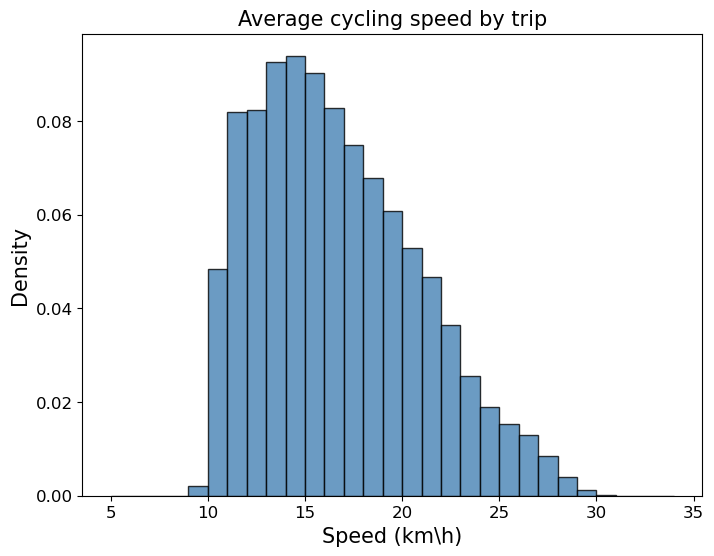

In [33]:

plt.figure(figsize=(8,6))
plt.hist(df_od_pairs_vg_complete.avg_cyc_speed, range(5,35,1), alpha=0.8,edgecolor='black',color='steelblue', histtype='bar', align='mid', density=True) #, bins=[5,7.5,10,12.5,15,17.5,20,22.5,25,27.5,30,32.5,35 ])

plt.title('Average cycling speed by trip',fontsize=15)
plt.xlabel('Speed (km/h)',fontsize=15)
plt.ylabel('Density',fontsize=15)

#plt.legend(loc='upper right',fontsize=30)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

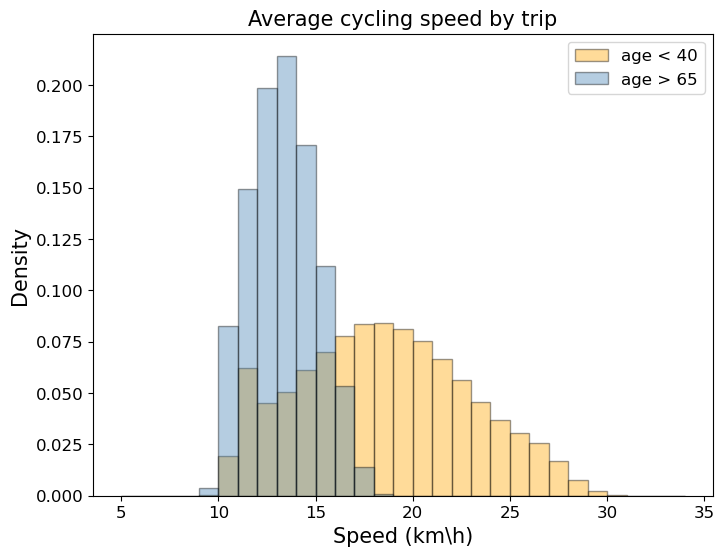

In [44]:
plt.figure(figsize=(8,6))

plt.hist(df_od_pairs_vg_complete[df_od_pairs_vg_complete.Age <40 ].avg_cyc_speed, range(5,35,1), alpha=0.4,edgecolor='black',color='orange', histtype='bar', align='mid', density=True, label= 'age < 40')
plt.hist(df_od_pairs_vg_complete[df_od_pairs_vg_complete.Age >65 ].avg_cyc_speed, range(5,35,1), alpha=0.4,edgecolor='black',color='steelblue', histtype='bar', align='mid', density=True, label= 'age > 65')
#plt.hist(df_od_pairs_vg_complete[(df_od_pairs_vg_complete.Age >=40)&(df_od_pairs_vg_complete.Age <=65) ].avg_cyc_speed, range(5,35,1), alpha=0.4,edgecolor='black',color='palegreen', histtype='bar', align='mid', density=True, label= 'age between 65')


plt.title('Average cycling speed by trip',fontsize=15)
plt.xlabel('Speed (km/h)',fontsize=15)
plt.ylabel('Density',fontsize=15)

plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [3]:
import pandas as pd

df_routes = pd.read_pickle(r'C:\emobility\dbs\output\file_40.pkl')




In [4]:
243/60

4.05

In [2]:


sensitivity = pd.read_csv(f'./dbs/output/sensitivity_analysis.csv', delimiter=";")


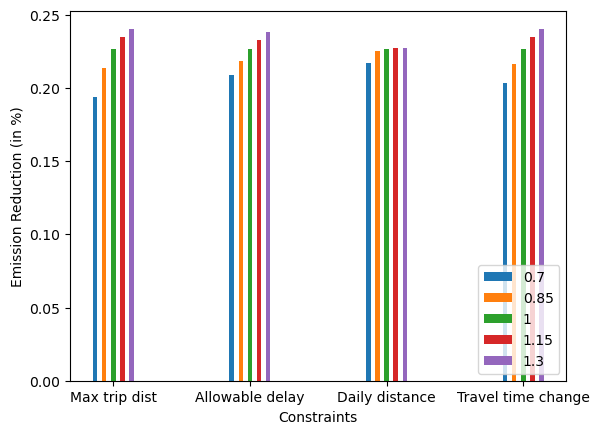

In [3]:
# create data
x = np.arange(4)
x = np.arange(0,12,3)


a1 = [0.19385, 0.20888, 0.21714, 0.20321]
a2 = [0.21385, 0.21871, 0.22543, 0.21648]
a3 = [0.22700, 0.22700, 0.22700, 0.22700]
a4 = [0.23512, 0.23307, 0.22727, 0.23466]
a5 = [0.24058, 0.23825, 0.22746, 0.24036]


# y1 = [0.19385,0.21385,0.22700,0.23512,0.24058]
# y2 = [0.20888,0.21871,0.22700,0.23307,0.23825]
# y3 = [0.21714,0.22543,0.22700,0.22727,0.22746]
# y4 = [0.20321,0.21648,0.22700,0.23466,0.24036]

width = 0.1

# plot data in grouped manner of bar type
plt.bar(x-0.4, a1, width)
plt.bar(x-0.2, a2, width)
plt.bar(x, a3, width)
plt.bar(x+0.2, a4, width)
plt.bar(x+0.4, a5, width)

plt.xticks(x, ['Max trip dist', 'Allowable delay', 'Daily distance', 'Travel time change'])
plt.xlabel("Constraints")
plt.ylabel("Emission Reduction (in %)")
plt.legend(["0.7", "0.85", "1", "1.15", "1.3"], loc="lower right")
plt.show()

In [126]:
# all residents


x = np.arange(0,12,3)


a1 = [0.19385, 0.20888, 0.21714, 0.20321]
a2 = [0.21385, 0.21871, 0.22543, 0.21648]
#a3 = [0.22700, 0.22700, 0.22700, 0.22700]
a4 = [0.23512, 0.23307, 0.22727, 0.23466]
a5 = [0.24058, 0.23825, 0.22746, 0.24036]


a1 = [x*100 - 22.7 for x in a1]
a2 = [x*100 - 22.7 for x in a2]
#a3 = [0.22700, 0.22700, 0.22700, 0.22700]
a4 = [x*100 - 22.7 for x in a4]
a5 = [x*100 - 22.7 for x in a5]


plt.figure(figsize=(8,6))

width = 0.3

# plot data in grouped manner of bar type
plt.bar(x, a1, width, color='#17becf', edgecolor = "black")
plt.bar(x, a2, width, color='#1f77b4', edgecolor = "black")
#plt.bar(x, a3, width)
plt.bar(x, a5, width, color='#17becf', edgecolor = "black")
plt.bar(x, a4, width, color='#1f77b4', edgecolor = "black")


plt.xticks(x, ['Maximum trip dist', 'Allowable delay', 'Daily travel distance', 'Daily travel time change'], fontsize=10)
plt.xlabel("Constraints", fontsize=13)
plt.ylabel("Change in the emission reduction (in %)", fontsize=13)
plt.legend(["+/- 30%", "+/- 15%"], loc="upper right", title = "Change in the constraint")
plt.ylim(-5,5)
#plt.xlim(-2,12)

plt.axhline(y = 0, color = 'r', linestyle = ':')


plt.savefig(r'.\figures\sensitivity_emission.jpg')

#plt.show()

In [155]:
# within VG region


x = np.arange(0,12,3)



a1 = sensitivity[['reduction_within','reduction_within.1','reduction_within.2','reduction_within.3']].iloc[0].to_list()
a2 = sensitivity[['reduction_within','reduction_within.1','reduction_within.2','reduction_within.3']].iloc[1].to_list()

a4 = sensitivity[['reduction_within','reduction_within.1','reduction_within.2','reduction_within.3']].iloc[3].to_list()
a5 = sensitivity[['reduction_within','reduction_within.1','reduction_within.2','reduction_within.3']].iloc[4].to_list()


a1 = [x*100 - 25.5 for x in a1]
a2 = [x*100 - 25.5 for x in a2]
a4 = [x*100 - 25.5 for x in a4]
a5 = [x*100 - 25.5 for x in a5]


plt.figure(figsize=(8,7))

width = 0.3

# plot data in grouped manner of bar type
plt.bar(x, a1, width, color='#9fc08f', edgecolor = "black")
plt.bar(x, a2, width, color='#488f31', edgecolor = "black")
#plt.bar(x, a3, width)
plt.bar(x, a5, width, color='#a7cfe9', edgecolor = "black")
plt.bar(x, a4, width, color='#437594', edgecolor = "black")


plt.xticks(x, ['Maximum trip \ndistance', 'Allowable delay', 'Daily travel \ndistance', 'Daily travel \ntime change'], fontsize=14)
plt.xlabel("Constraints", fontsize=16)
plt.ylabel("Change in the emission reduction (in %)", fontsize=16)
plt.legend(["+ 30%", "+ 15%","- 30%", "- 15%"], loc="upper right", title = "Change in the constraint")
plt.ylim(-5,5)
#plt.xlim(-2,12)

plt.axhline(y = 0, color = 'r', linestyle = ':')


plt.savefig(r'.\figures\sensitivity_emission_VGR.jpg')




In [157]:
# replacement


x = np.arange(0,12,3)



a1 = sensitivity[['max_trip_dist ','activity_time_dividing','daily_max_trip_dist','daily_travel_time']].iloc[0].to_list()
a2 = sensitivity[['max_trip_dist ','activity_time_dividing','daily_max_trip_dist','daily_travel_time']].iloc[1].to_list()

a4 = sensitivity[['max_trip_dist ','activity_time_dividing','daily_max_trip_dist','daily_travel_time']].iloc[3].to_list()
a5 = sensitivity[['max_trip_dist ','activity_time_dividing','daily_max_trip_dist','daily_travel_time']].iloc[4].to_list()


a1 = [x*100 - 57.6 for x in a1]
a2 = [x*100 - 57.6 for x in a2]
a4 = [x*100 - 57.6 for x in a4]
a5 = [x*100 - 57.6 for x in a5]


plt.figure(figsize=(8,7))

width = 0.5

# plot data in grouped manner of bar type
plt.bar(x, a1, width, color='#9fc08f', edgecolor = "black")
plt.bar(x, a2, width, color='#488f31', edgecolor = "black")
#plt.bar(x, a3, width)
plt.bar(x, a5, width, color='#a7cfe9', edgecolor = "black")
plt.bar(x, a4, width, color='#437594', edgecolor = "black")


plt.xticks(x, ['Maximum trip \ndistance', 'Allowable delay', 'Daily travel \ndistance', 'Daily travel \ntime change'], fontsize=14)
plt.xlabel("Constraints", fontsize=16)
plt.ylabel("Change in the e-bike substitution (in %)", fontsize=16)
#plt.legend(["+ 30%", "+ 15%","- 30%", "- 15%"], loc="upper right", title = "Change in the constraint")
plt.ylim(-5,5)
#plt.xlim(-2,12)

plt.axhline(y = 0, color = 'r', linestyle = ':')


plt.savefig(r'.\figures\sensitivity_replacement.jpg')



In [3]:
## THIS CODE GENERATES GRAPH FOR THE PAPER

# within VG region


x = np.arange(1,5,1)



a1 = sensitivity[['reduction_within.2','reduction_within.1','reduction_within.3','reduction_within']].iloc[0].to_list()
a2 = sensitivity[['reduction_within.2','reduction_within.1','reduction_within.3','reduction_within']].iloc[1].to_list()

a4 = sensitivity[['reduction_within.2','reduction_within.1','reduction_within.3','reduction_within']].iloc[3].to_list()
a5 = sensitivity[['reduction_within.2','reduction_within.1','reduction_within.3','reduction_within']].iloc[4].to_list()


a1 = [x*100 - 25.6 for x in a1]
a2 = [x*100 - 25.6 for x in a2]
a4 = [x*100 - 25.6 for x in a4]
a5 = [x*100 - 25.6 for x in a5]


plt.figure(figsize=(16.5,8))

width = 0.25

# plot data in grouped manner of bar type
plt.barh(x, a1, width, color='#9fc08f', edgecolor = "black")
plt.barh(x, a2, width, color='#488f31', edgecolor = "black")
#plt.bar(x, a3, width)
plt.barh(x, a5, width, color='#a7cfe9', edgecolor = "black")
plt.barh(x, a4, width, color='#437594', edgecolor = "black")



plt.yticks(x, ['Daily travel \ndistance', 'Allowable delay',  'Daily travel \ntime change','Maximum trip \ndistance'], fontsize=18)
#plt.xlabel("Constraints", fontsize=16)
plt.xticks( fontsize=18)

plt.xlabel("Change in the emission reduction (in percentage point)", fontsize=20)
plt.legend(["- 30%", "- 15%","+ 30%", "+ 15%"], loc="lower right", title = "Change in the constraint", fontsize=18, title_fontsize=18)
plt.xlim(-4,3)
plt.ylim(0,5)

plt.axvline(x= 0, color = 'r', linestyle = ':')


plt.savefig(r'.\figures\sensitivity_emission_VGRh.jpg')



In [4]:
## THIS CODE GENERATES GRAPH FOR THE PAPER

# replacement


x = np.arange(1,5,1)


a1 = sensitivity[['daily_max_trip_dist','max_trip_dist ','daily_travel_time','activity_time_dividing']].iloc[0].to_list()
a2 = sensitivity[['daily_max_trip_dist','max_trip_dist ','daily_travel_time','activity_time_dividing']].iloc[1].to_list()

a4 = sensitivity[['daily_max_trip_dist','max_trip_dist ','daily_travel_time','activity_time_dividing']].iloc[3].to_list()
a5 = sensitivity[['daily_max_trip_dist','max_trip_dist ','daily_travel_time','activity_time_dividing']].iloc[4].to_list()


a1 = [x*100 - 57.6 for x in a1]
a2 = [x*100 - 57.6 for x in a2]
a4 = [x*100 - 57.6 for x in a4]
a5 = [x*100 - 57.6 for x in a5]


plt.figure(figsize=(16.5,8))

width = 0.25

# plot data in grouped manner of bar type
plt.barh(x, a1, width, color='#9fc08f', edgecolor = "black")
plt.barh(x, a2, width, color='#488f31', edgecolor = "black")
#plt.bar(x, a3, width)
plt.barh(x, a5, width, color='#a7cfe9', edgecolor = "black")
plt.barh(x, a4, width, color='#437594', edgecolor = "black")


plt.yticks(x, ['Daily travel \ndistance', 'Maximum trip \ndistance',  'Daily travel \ntime change' , 'Allowable delay'  ], fontsize=18)
plt.xticks( fontsize=18)
# plt.ylabel("Constraints", fontsize=16)
plt.xlabel("Change in the e-bike substitution (in percentage point)", fontsize=20)
plt.legend(["- 30%", "- 15%","+ 30%", "+ 15%"], loc="lower right", title = "Change in the constraint", fontsize=18, title_fontsize=18)
plt.xlim(-4,3)
plt.ylim(0,5)

plt.axvline(x= 0, color = 'r', linestyle = ':')


plt.savefig(r'.\figures\sensitivity_replacementh.jpg')



### Design the daily plan visualization

In [36]:
df_tst = pd.DataFrame()
df_tst.loc[:, 'seq'] = range(1, 6)
df_tst.loc[:, 'time'] = [8, 1.5, 8, 1.5, 5.0]
df_tst.loc[:, 'act'] = ['home', 'car', 'work', 'car', 'home']
ind = "Agent_1"
df_tst.loc[:, 'PId'] = ind
df_tst.loc[:, 'time_start'] = np.hstack((0,df_tst.loc[:, 'time'].cumsum().values[:-1]))
df_tst.head()

,seq,time,act,PId,time_start
0,1,8.0,home,Agent_1,0.0
1,2,1.5,car,Agent_1,8.0
2,3,8.0,work,Agent_1,9.5
3,4,1.5,car,Agent_1,17.5
4,5,5.0,home,Agent_1,19.0


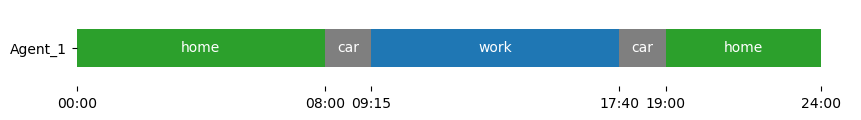

In [37]:
color_dict = {
    'home': 'tab:green',
    'car': 'tab:gray',
    'work': 'tab:blue',
    'car': 'tab:gray',
    'other': 'tab:orange'
}
# Declaring a figure "gnt"
fig, ax = plt.subplots(figsize=(10, 1))

# Setting Y-axis limits
ax.set_xlim(0, 25)
ax.set_ylim(-2, 2)
#sns.scatterplot(df_tst, y='PId', x='time', ax=ax)
ax.broken_barh(list(zip(df_tst.time_start, df_tst.time)), (-1, 2),
               facecolors =[color_dict[x] for x in df_tst.act])
for x1, x2, act in df_tst[['time_start', 'time', 'act']].values:
    ax.text(x=x1 + x2/2,
            y=0,
            s=act,
            ha='center',
            va='center',
            color='white',
            )
ax.set_xticks([x for x in df_tst.time_start] + [24],
              labels=["00:00","08:00","09:15","17:40","19:00","24:00"])
ax.set_yticks([0], labels=[f'{ind}'])
plt.box(on=None)

plt.savefig(r'.\figures\dailyplan_caragent.jpg')

plt.show()

In [46]:
df_tst = pd.DataFrame()
df_tst.loc[:, 'seq'] = range(1, 6)
df_tst.loc[:, 'time'] = [8, 2, 8, 2.5, 3.5]
df_tst.loc[:, 'act'] = ['home', 'e-bike', 'work', 'e-bike', 'home']
ind = "Agent_1"
df_tst.loc[:, 'PId'] = ind
df_tst.loc[:, 'time_start'] = np.hstack((0,df_tst.loc[:, 'time'].cumsum().values[:-1]))
df_tst.head()

,seq,time,act,PId,time_start
0,1,8.0,home,Agent_1,0.0
1,2,2.0,e-bike,Agent_1,8.0
2,3,8.0,work,Agent_1,10.0
3,4,2.5,e-bike,Agent_1,18.0
4,5,3.5,home,Agent_1,20.5


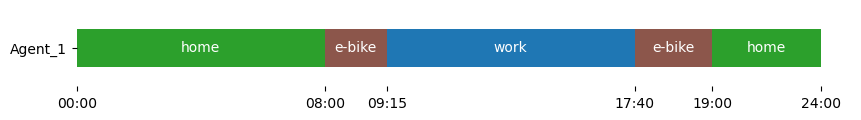

In [47]:
color_dict = {
    'home': 'tab:green',
    'e-bike': 'tab:brown',
    'work': 'tab:blue',
    'e-bike': 'tab:brown',
    'other': 'tab:orange'
}
# Declaring a figure "gnt"
fig, ax = plt.subplots(figsize=(10, 1))

# Setting Y-axis limits
ax.set_xlim(0, 25)
ax.set_ylim(-2, 2)
#sns.scatterplot(df_tst, y='PId', x='time', ax=ax)
ax.broken_barh(list(zip(df_tst.time_start, df_tst.time)), (-1, 2),
               facecolors =[color_dict[x] for x in df_tst.act])
for x1, x2, act in df_tst[['time_start', 'time', 'act']].values:
    ax.text(x=x1 + x2/2,
            y=0,
            s=act,
            ha='center',
            va='center',
            color='white',
            )
ax.set_xticks([x for x in df_tst.time_start] + [24],
              labels=["00:00","08:00","09:15","17:40","19:00","24:00"])
ax.set_yticks([0], labels=[f'{ind}'])
plt.box(on=None)

plt.savefig(r'.\figures\dailyplan_caragent.jpg')

plt.show()